# Versuch 1: Statistik I: Würfel-Simulation

In [119]:
#Name: Finn Jannik Wagner
#Matrikelnummer: 8102237
#E-Mail-Adresse: finn.jannik.wagner@physik.uni-giessen.de
#Studiengang: Physik
#Wiederholen Sie das Praktikum (Ja/Nein)? Nein

#Name: Finn Henrik Bietz
#Matrikelnummer: 8104485
#E-Mail-Adresse: finn.henrik.bietz@physik.uni-giessen.de
#Studiengang: Physik 
#Wiederholen Sie das Praktikum (Ja/Nein)? Nein

Die folgenden Aufgaben basieren auf der Generierung von (Pseudo-)Zufallszahlen am Computer. Daher liefert ein mehrfaches Ausführen der Versuche unterschiedliche Werte. Führen Sie den Code jeder einzelnen Aufgabe daher mindestens dreimal aus und dokumentieren Sie die Ergebnisse. Nutzen Sie dann (wie auch bei Experimenten im Labor) den Mittelwert und die Standardabweichung, wenn Sie die Fragen in Ihrem Protokoll beantworten.

##### Aufgabenstellung: 
Für die folgenden Aufgaben werden die Ergebnisse von Würfelwürfen untersucht. <br><br>
a) Berechnen Sie zunächst (auf Papier) den Erwartungswert, sowie die Standardabweichung eines 6-seitigen Würfels, für die Augensumme von i) zwei iii) fünf und iv) zehn Würfeln.  <br><br>
b) Berechnen Sie zunächst den Erwartungswert, sowie die Standardabweichung eines 20-seitigen Würfels, für i) die Augenzahl eines Würfels, sowie für die Augensumme von ii) zwei iii) fünf und iv) zehn Würfeln.  <br><br>
c) Simulieren Sie mit Hilfe der Funktion dice(n, m = 1, k = 20, save = "example") ein Zufallsexperiment. Dabei soll ein 20-seitiger Würfel i) $n = 100$ mal, ii) $n = 1000$ und iii) $n = 10000$ mal geworfen werden. Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil b). <br><br>
d) Simulieren Sie mit Hilfe der Funktion dice(n=1000, m, k=20, save = "example") ein Zufallsexperiment. Dabei sollen i) zwei, ii) fünf und iii) zehn 20-seitige Würfel je 1000 mal geworfen werden. Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil a). <br><br>
e) Interpretieren Sie Ihre Ergebnisse. Entsprechen Sie Ihren Erwartungen?  <br><br>
f) Führen Sie mit den Werten aus d) mit Hilfe der Funktion chi_squared(x = points, sigma, mu, save = "example") einen Fit durch. Dabei wird eine Gaußfunktion als theoretische Funktion verwendet. Vergleichen sie die $\chi ^2$ Werte. Welcher Wert ist besonders hoch/gering und woran könnte das liegen? <br><br>
g) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels i) mindestens einmal die 20 fällt? ii) höchstens 2 mal die 1 fällt? iii) genau 3 mal die 5 fällt? iv) genau 3 mal die 5 UND höchstens 2 mal die 1 (Tipp: Baumdiagramm kann helfen)


##### Bemerkung: 
Sie können gerne auch mit anderen Werten herumspielen, um ein besseres Gefühl für die Zusammenhänge zu bekommen. Verwenden Sie in diesem Fall die entsprechende Funktion ohne das save-Argument, also dice(n, m, k) anstatt dice(n, m, k, save). Für die Auswertung sind der Werte aus der Aufgabenstellung relevant.

##### Speichern: 
In Ihrem Browser über Drucken->Print as PDF (Speichern als PDF)

In [3]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

In [4]:
def dice (n, m, k, save = False):                                       
    
    """
    dice(n, m, k, save) 
    n = Anzahl der Würfelwürfe (Integer), 
    m = Anzahl der Würfel (Integer), 
    k = Anzahl der Würfelseiten (Integer) 
    save = Name des PDFs (String)
    
    Funktion plottet Histogramm eines simulierten Würfelexperiments, inklusive Markierung für den Mittelwert
    und gibt den Array, den Mittelwert und die Standardabweichung der 
    Augensummen aus. Zumdem wird ein PDF erstellt, falls save übergeben wird
    """
    m1 = m
    k1 = k
    dice_matrix=np.array([])                                            #leeres Array zum Auffüllen
    for i in range (n):
        dice_row=np.array([])
        for j in range (m):
            dice_row=np.append(dice_row,[rnd.randint(1,k+1)])           #m-er Reihe wird erzeugt. Gefüllt durch Randoms
        dice_matrix= np.append(dice_matrix,[dice_row])                  #n-te m-er Reihe wird dem Array hinzugefügt
    dice_sum = sum(dice_matrix.reshape(n,m).transpose())                #Summe der Augenzahlen
    plt.hist(dice_sum, bins = (k-1)*m+1, 
             range = (m, m*k), color = 'limegreen' , density = True)    #Histogram mit relativen Häufigkeit
    plt.axvline(np.mean(dice_sum),color='black' ,linestyle='--')        #vertikale Linie des Mittelwertes
    plt.xlabel("Augenzahl")                                             #Bezeichnung x-Achse
    plt.ylabel("Relative Häufigkeit")                                   #Bezeichnung y-Achse
    if (save != False):                                                 #wenn save ein String s ist, wird ein PDF mit dem Namen s gespeichert
        plt.title(save)
        plt.savefig(save+'.pdf')
    plt.show()                                                          #Plot
    print ("Arithmetisches Mittel: ", np.mean(dice_sum), "\nEmpirische Standardabweichung: ", np.std(dice_sum) )              
    return (dice_sum, np.mean(dice_sum), np.std(dice_sum), k1, m1 )             #Array, Mittelwert und Standardabweichung der Augensummen


def gauss(sigma, mu, x):
    a = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5* (x - mu)**2 /sigma**2)
    return a   

def chi_squared(y, sigma, mu, save = False):
    x = y[0]
    k = y[3]
    m = y[4]
    A = plt.hist(x, bins = np.arange(m,m*k+2), density = True)
    a= sum((((gauss(sigma, mu, A[1][:-1]) - A[0]) **2) /gauss(sigma, mu, A[1][:-1])))
    plt.plot(np.linspace(0, m*k+2, 1000), gauss(sigma, mu, np.linspace(0, m*k+2, 1000)), 'r')
    plt.xlabel("Augenzahl")
    plt.ylabel("Relative Häufigkeit")
    if (save != False):
        plt.title(save)
        plt.savefig(save+'.pdf')
    plt.show()
    print("chi-Quadrat:", a )
    pass


# Aufgabe 1a)
Erwartungswerte von 6-seitigen Würfeln
## 1 Würfel:
Alle 6 Werte des Würfels sind gleich wahrscheinlich mit der Wahrscheinlichkeit 1/6. <br>
Der Erwartungswert $µ$ ist damit $1*1/6 + 2 * 1/6 + 3*1/6 + 4*1/6 + 5*1/6 + 6*1/6 = µ = 3.5$ <br>
Die Standardabweichung ist $math.sqrt(1/6*(3.5 - 1)**2 + 1/6*(3.5 - 2)**2 + 1/6*(3.5 - 3)**2 + 1/6*(3.5 - 4)**2 + 1/6*(3.5 - 5)**2 + 1/6*(3.5 - 6)**2) = math.sqrt(17.5/6) ≈ 1.71$
    
## 2 Würfel:
Da einzelne Würfelwürfe unabhängig von einander sind und für den Erwartungswert Linearität gilt, ist der Erwartungswert für $n$ Würfel $n*3.5$ <br>
In diesem Fall also $µ = 2*3.5 = 7$
    
Die Standardabweichung ist: <br>
$math.sqrt( 1/36*(7 - 2)**2 + 2/36*(7 - 3)**2 + 3/36*(7 - 4)**2 + 4/36*(7 - 5)**2 + 5/36*(7 - 6)**2 + 6/36*(7 - 7)**2 + 5/36*(7 - 8)**2 + 4/36*(7 - 9)**2 + 3/36*(7 - 10)**2 + 2/36*(7 - 11)**2 + 1/36*(7 - 12)**2) = math.sqrt(35/6) = math.sqrt(2 * 17.5/6) ≈ 2.42$ <br>
Für die Varianz gilt bei unabhängigen Würfelwürfen ebenfalls Linearität, diese lässt sich da die Wurzelfunktion monoton ist auch auf die Standardabweichung übertragen. <br>
Die Standardabweichung für zwei Würfel ist die eines Würfels mal den Faktor $math.sqrt(2)$.
    
## 5 Würfel:
Erwartungswert µ = 5*3.5 = 17.5 <br>
Standardabweichung σ = math.sqrt(5 * 17.5/6) ≈ 3.82
    
## 10 Würfel:
Erwartungswert µ = 10*3.5 = 35 <br>
Standardabweichung σ = math.sqrt(10 * 17.5/6) ≈ 5.4

# Aufgabe 1b)

Wir nehmen an das sich bei dem Würfel um einen Ikosaeder handelt, alle Seiten also die gleiche Wahrscheinlichkeit 1/20 haben.

## 1 Würfel:
Der Erwartungswert ist damit $µ = 1*1/20 + 2*1/20 + 3*1/20 + ... = 1/20 * (1+2+3+...) = (20+1)/2 * 20 * 1/20 = 21/2 = 10.5$ <br>
Die Standardabweichung ist $σ = math.sqrt(1/20 * sum([(10.5 - i)**2 $for i in range$(1, 20+1)])) = math.sqrt(133/4) ≈ 5.77$ <br>

Äquivalent zu einem 6 seitigen Würfel lassen sich Erwartungswert und Standardabweichung für mehrere Würfe auf Grund von Monotonie einfach bestimmen.

## 2 Würfel:
Erwartungswert $µ = 2*10.5 = 21$ <br>
Standardabweichung $σ = math.sqrt(2 * 133/4) ≈ 8.15$
    
## 5 Würfel:
Erwarungswert $µ = 5*10.5 = 52.5$ <br>
Standardabweichung $σ = math.sqrt(5 * 133/4) ≈ 12.89$

## 10 Würfel:
Erwarungswert $µ = 10*10.5 = 105$ <br>
Standardabweichung $σ = math.sqrt(10 * 133/4) ≈ 18.23$

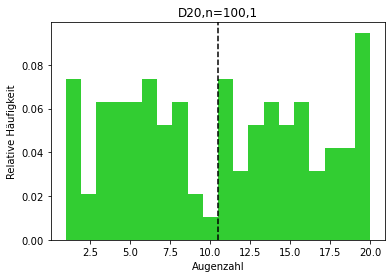

Arithmetisches Mittel:  10.48 
Empirische Standardabweichung:  6.03569382921301


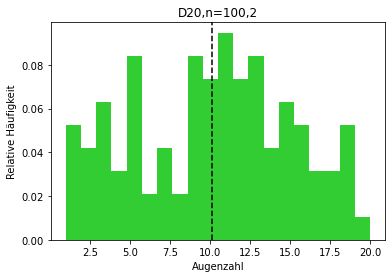

Arithmetisches Mittel:  10.14 
Empirische Standardabweichung:  5.188487255453173


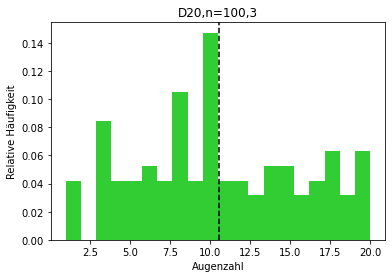

Arithmetisches Mittel:  10.55 
Empirische Standardabweichung:  5.359804100897718


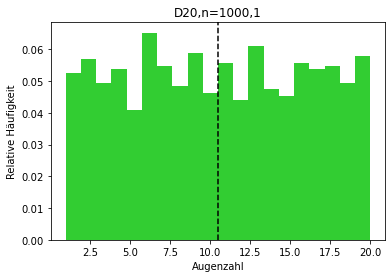

Arithmetisches Mittel:  10.506 
Empirische Standardabweichung:  5.80034171407168


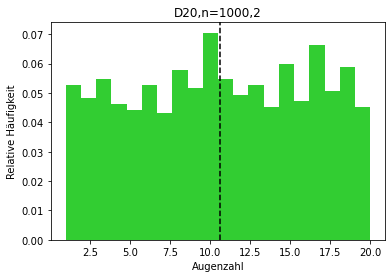

Arithmetisches Mittel:  10.644 
Empirische Standardabweichung:  5.711152598206426


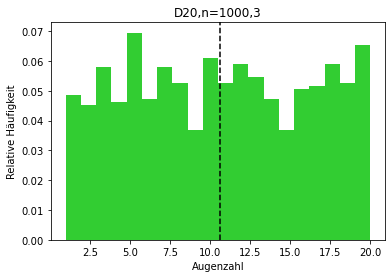

Arithmetisches Mittel:  10.605 
Empirische Standardabweichung:  5.813000516084616


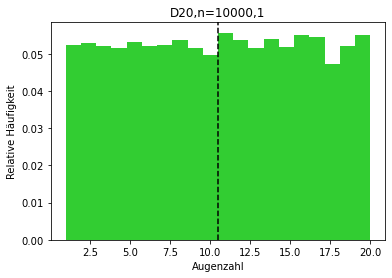

Arithmetisches Mittel:  10.5165 
Empirische Standardabweichung:  5.762874955263214


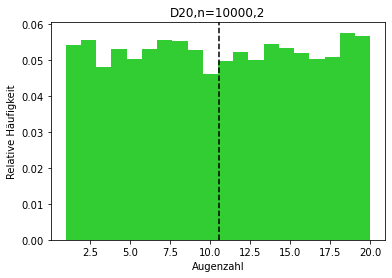

Arithmetisches Mittel:  10.537 
Empirische Standardabweichung:  5.821909566456696


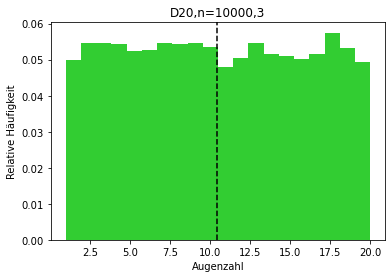

Arithmetisches Mittel:  10.4483 
Empirische Standardabweichung:  5.763655707101179
(array([15.,  5., 20.,  8., 19., 17., 16.,  6.,  9.,  6., 13., 18., 13.,
        3.,  3., 11., 12.,  8.,  4., 15.,  5.,  6., 15.,  7., 14., 20.,
       20., 20., 12., 18.,  7.,  5., 15., 18., 13., 15.,  7.,  1., 17.,
       20.,  3., 14., 20., 19.,  7., 19., 16.,  8., 13.,  6.,  1., 20.,
       11.,  1.,  6.,  3., 17.,  4.,  8.,  1.,  1.,  4., 11., 14., 16.,
        9., 10., 19., 14.,  1., 14., 11.,  7.,  5., 13.,  3.,  2., 16.,
       20., 12., 20.,  5., 11.,  4.,  8.,  6.,  1.,  5., 11., 11., 16.,
        4.,  4.,  6.,  8., 14., 18.,  3.,  2., 16.]), 10.48, 6.03569382921301, 20, 1) (array([ 3.,  5., 19.,  9., 13.,  9.,  3.,  8., 15., 17., 18., 10., 11.,
       15.,  9.,  3., 10., 14., 12.,  1., 10.,  1., 17.,  9., 14., 16.,
        9., 11.,  2.,  5.,  2.,  5., 20.,  2., 16., 19., 19.,  7., 11.,
       10.,  5., 11., 13., 13., 10., 11., 10., 10., 14.,  5.,  3., 13.,
        7.,  9., 12., 13., 18., 11., 

In [136]:
#Aufgabe 1c)

dice1_1 = dice(n=100, m=1, k=20, save = "D20,n=100,1") #Ergebnisse für 100 Würfe
dice1_2 = dice(n=100, m=1, k=20, save = "D20,n=100,2")
dice1_3 = dice(n=100, m=1, k=20, save = "D20,n=100,3")
dice2_1 = dice(n=1000, m=1, k=20, save = "D20,n=1000,1") #Ergebnisse für 1000 Würfe
dice2_2 = dice(n=1000, m=1, k=20, save = "D20,n=1000,2")
dice2_3 = dice(n=1000, m=1, k=20, save = "D20,n=1000,3")
dice3_1 = dice(n=10000, m=1, k=20, save = "D20,n=10000,1") #Ergebnisse für 10000 Würfe
dice3_2 = dice(n=10000, m=1, k=20, save = "D20,n=10000,2")
dice3_3 = dice(n=10000, m=1, k=20, save = "D20,n=10000,3")
print(dice1_1, dice1_2, dice1_3, dice2_1, dice2_2, dice2_3, dice3_1, dice3_2, dice3_3)

In [8]:
# Wie berechnet man den Mittelwert dreier Ergebnisse?
# Anleitung: schreiben Sie z.B. (3.1+3.2+3.3)/3
#Hier ein Testbeispiel
(3.1+3.2+3.3)/3

3.2000000000000006

In [137]:
# Berechnen Sie den Mittelwert für Ihre Ergebnisse aus 1 c)
#Schreiben Sie hier Ihren eigenen Code angelehnt an das vorherige Beispiel

#Auswertung Mittelwert für 100 Würfe:
mw1 = (dice1_1[1]+dice1_2[1]+dice1_3[1])/3
s1 = (dice1_1[2]+dice1_2[2]+dice1_3[2])/3
print(f'Die Mittelwerte der experimentellen Ergebnisse bei {100} Würfen:\nMittelwert der eperimentellen Arithmetischen Mittelwerte: {mw1}\nMittelwert der eperimentellen Empirischen Standardabweichungen: {s1}')
print(f'Das Arithmetische Mittel weicht um {abs((mw1/10.5-1))*100}% von dem berechneten Erwartungswert ab')
print(f'Die Empirische Standardabweichung weicht um {abs((s1/5.7663-1))*100}% von der errechneten Standardabweichung ab')

Die Mittelwerte der experimentellen Ergebnisse bei 100 Würfen:
Mittelwert der eperimentellen Arithmetischen Mittelwerte: 10.39
Mittelwert der eperimentellen Empirischen Standardabweichungen: 5.527995061854633
Das Arithmetische Mittel weicht um 1.0476190476190417% von dem berechneten Erwartungswert ab
Die Empirische Standardabweichung weicht um 4.1327183487742% von der errechneten Standardabweichung ab


In [138]:
#Auswertung Mittelwert für 1000 Würfe:
mw2 = (dice2_1[1]+dice2_2[1]+dice2_3[1])/3
s2 = (dice2_1[2]+dice2_2[2]+dice2_3[2])/3
print(f'Die Mittelwerte der experimentellen Ergebnisse bei {1000} Würfen:\nMittelwert der eperimentellen Arithmetischen Mittelwerte: {mw2}\nMittelwert der eperimentellen Empirischen Standardabweichungen: {s2}')
print(f'Das Arithmetische Mittel weicht um {abs((mw2/10.5-1))*100}% von dem berechneten Erwartungswert ab')
print(f'Die Empirische Standardabweichung weicht um {abs((s2/5.7663-1))*100}% von der errechneten Standardabweichung ab')

Die Mittelwerte der experimentellen Ergebnisse bei 1000 Würfen:
Mittelwert der eperimentellen Arithmetischen Mittelwerte: 10.584999999999999
Mittelwert der eperimentellen Empirischen Standardabweichungen: 5.774831609454242
Das Arithmetische Mittel weicht um 0.8095238095237933% von dem berechneten Erwartungswert ab
Die Empirische Standardabweichung weicht um 0.147956392387516% von der errechneten Standardabweichung ab


In [139]:
#Auswertung Mittelwert für 10000 Würfe:
mw3 = (dice3_1[1]+dice3_2[1]+dice3_3[1])/3
s3 = (dice3_1[2]+dice3_2[2]+dice3_3[2])/3
print(f'Die Mittelwerte der experimentellen Ergebnisse bei {10000} Würfen:\nMittelwert der eperimentellen Arithmetischen Mittelwerte: {mw3}\nMittelwert der eperimentellen Empirischen Standardabweichungen: {s3}')
print(f'Das Arithmetische Mittel weicht um {abs((mw3/10.5-1))*100}% von dem berechneten Erwartungswert ab')
print(f'Die Empirische Standardabweichung weicht um {abs((s3/5.7663-1))*100}% von der errechneten Standardabweichung ab')

Die Mittelwerte der experimentellen Ergebnisse bei 10000 Würfen:
Mittelwert der eperimentellen Arithmetischen Mittelwerte: 10.5006
Mittelwert der eperimentellen Empirischen Standardabweichungen: 5.78281340960703
Das Arithmetische Mittel weicht um 0.005714285714297773% von dem berechneten Erwartungswert ab
Die Empirische Standardabweichung weicht um 0.2863779131684119% von der errechneten Standardabweichung ab


In [12]:
# Berechnen Sie die Standardabweichung für Ihre Ergebnisse aus (a)
# Anleitung: wenn 3.2 Ihr Mittelwert war, dann schreiben Sie
# np.sqrt((3.0-3.2)**2+(3.1-3.2)**2+(3.3-3.2)**2)
#Hier ein Testbeispiel
np.sqrt((3.1-3.2)**2+(3.2-3.2)**2+(3.4-3.2)**2)

0.22360679774997877

In [140]:
# Berechnen Sie die Standardabweichung für Ihre Ergebnisse aus 1 c)
#Schreiben Sie hier Ihren eigenen Code angelehnt an das vorherige Beispiel

#Auswertung Standardabweichung für 100 Würfe:
print(f'Die Standardabweichungen der experimentellen Werte bei {100} Würfen:\nArithmetisches Mittel: {np.sqrt((mw1-dice1_1[1])**2+(mw1-dice1_2[1])**2+(mw1-dice1_3[1])**2)}')
print(f'Empirische Standardabweichung der Empirischen Standardabweichungen: {np.sqrt((s1-dice1_1[2])**2+(s1-dice1_2[2])**2+(s1-dice1_3[2])**2)}')

Die Standardabweichungen der experimentellen Werte bei 100 Würfen:
Arithmetisches Mittel: 0.3101612483854165
Empirische Standardabweichung der Empirischen Standardabweichungen: 0.6334917429077959


In [141]:
#Auswertung Standardabweichung für 1000 Würfe
print(f'Die Standardabweichungen der experimentellen Werte bei {1000} Würfen:\nArithmetisches Mittel: {np.sqrt((mw2-dice2_1[1])**2+(mw2-dice2_2[1])**2+(mw2-dice2_3[1])**2)}')
print(f'Empirische Standardabweichung der Empirischen Standardabweichungen: {np.sqrt((s2-dice2_1[2])**2+(s2-dice2_2[2])**2+(s2-dice2_3[2])**2)}')

Die Standardabweichungen der experimentellen Werte bei 1000 Würfen:
Arithmetisches Mittel: 0.10060815076324581
Empirische Standardabweichung der Empirischen Standardabweichungen: 0.0785025308155751


In [142]:
#Auswertung Standardabweichung für 1000 Würfe
print(f'Die Standardabweichungen der experimentellen Werte bei {10000} Würfen:\nArithmetisches Mittel: {np.sqrt((mw3-dice3_1[1])**2+(mw3-dice3_2[1])**2+(mw3-dice3_3[1])**2)}')
print(f'Empirische Standardabweichung der Empirischen Standardabweichungen: {np.sqrt((s3-dice3_1[2])**2+(s3-dice3_2[2])**2+(s3-dice3_3[2])**2)}')

Die Standardabweichungen der experimentellen Werte bei 10000 Würfen:
Arithmetisches Mittel: 0.06567389131154108
Empirische Standardabweichung der Empirischen Standardabweichungen: 0.047886000118372976


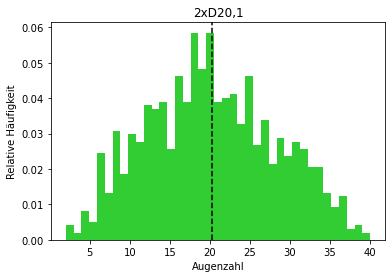

Arithmetisches Mittel:  20.215 
Empirische Standardabweichung:  8.227075725918658


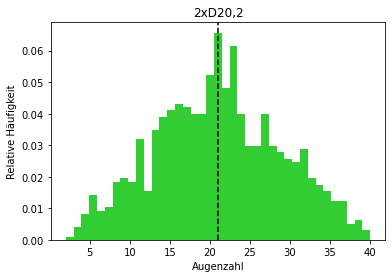

Arithmetisches Mittel:  21.023 
Empirische Standardabweichung:  8.03345946650632


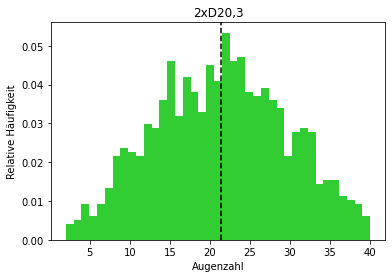

Arithmetisches Mittel:  21.404 
Empirische Standardabweichung:  8.433551090732777


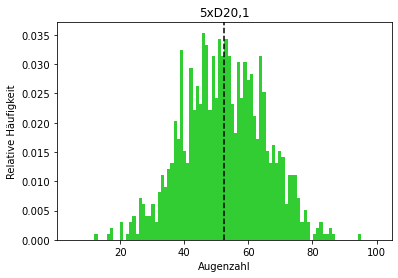

Arithmetisches Mittel:  52.486 
Empirische Standardabweichung:  12.801398517349579


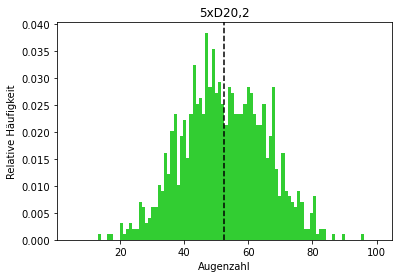

Arithmetisches Mittel:  52.457 
Empirische Standardabweichung:  13.115492785252105


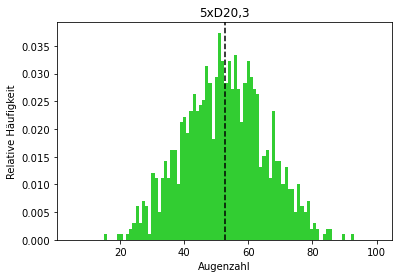

Arithmetisches Mittel:  52.679 
Empirische Standardabweichung:  12.883709054460986


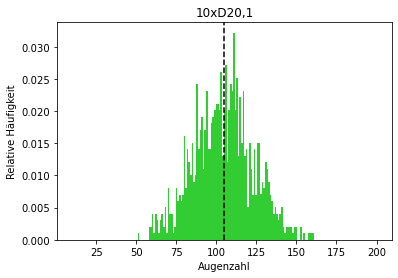

Arithmetisches Mittel:  104.615 
Empirische Standardabweichung:  18.859819060637886


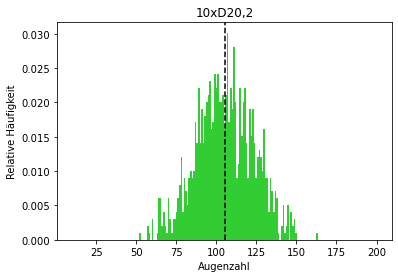

Arithmetisches Mittel:  105.449 
Empirische Standardabweichung:  18.153054811794075


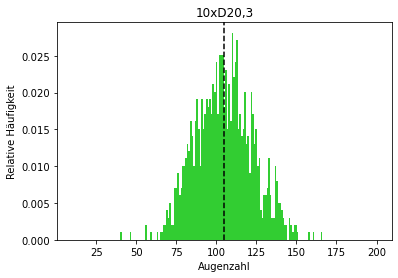

Arithmetisches Mittel:  104.979 
Empirische Standardabweichung:  18.02405500990274
(array([13., 12., 31.,  9., 11., 15., 18., 21., 32., 19., 27., 21., 14.,
       13., 21., 11., 22., 10., 24., 18.,  9., 17., 26., 18.,  8., 29.,
       15., 27., 24., 30.,  9., 21., 31., 11.,  4., 19., 36., 15., 28.,
       13., 32.,  9., 10., 27., 29.,  4., 27., 23., 14.,  6., 23., 20.,
       22., 23., 25., 34., 32., 12., 13., 30., 30., 37., 20.,  5., 25.,
       20., 27., 19., 21., 23., 23., 30., 34., 22.,  6., 18., 10., 12.,
       22., 14., 25.,  7., 21., 31., 21.,  8.,  8., 10., 31., 31., 24.,
       12., 36., 28., 15., 17., 19., 21., 12., 34., 20., 14., 13., 11.,
       19., 11., 11., 28.,  9., 20.,  8.,  6., 28., 19., 18., 18.,  8.,
       12., 18., 30.,  8., 30., 19., 19., 25.,  6., 25., 34., 29., 23.,
       33., 18., 18., 17., 24., 23., 32., 14., 27., 11., 27., 25., 27.,
       27., 31., 19., 20., 25., 27.,  5., 29., 21., 32., 21., 15., 34.,
       12.,  7., 27., 21., 17., 16., 23., 23., 12., 

In [161]:
#Aufgabe 1d)
dice4_1 = dice(n=1000, m=2, k=20, save = "2xD20,1") #Ergebnisse für 2 Würfel
dice4_2 = dice(n=1000, m=2, k=20, save = "2xD20,2")
dice4_3 = dice(n=1000, m=2, k=20, save = "2xD20,3")
dice5_1 = dice(n=1000, m=5, k=20, save = "5xD20,1") #Ergebnisse für 5 Würfel
dice5_2 = dice(n=1000, m=5, k=20, save = "5xD20,2")
dice5_3 = dice(n=1000, m=5, k=20, save = "5xD20,3")
dice6_1 = dice(n=1000, m=10, k=20, save = "10xD20,1") #Ergebnisse für 10 Würfel
dice6_2 = dice(n=1000, m=10, k=20, save = "10xD20,2")
dice6_3 = dice(n=1000, m=10, k=20, save = "10xD20,3")
print(dice4_1, dice4_2, dice4_3, dice5_1, dice5_2, dice5_3, dice6_1,dice6_2, dice6_3)

In [162]:
#Auswertung Mittelwert für 2 Würfel
MW2 = (dice4_1[1]+dice4_2[1]+dice4_3[1])/3
print(f'Der Mittelwert der Mittelwerte liegt bei 2 Würfeln bei: {MW2}')
print(f'Mit einer Standardabweichung von: {np.sqrt((MW2-dice4_1[1])**2+(MW2-dice4_2[1])**2+(MW2-dice4_3[1])**2)}')
print(f'Das ist eine Abweichung vom berechneten Erwartungswert von: {(abs(MW2/21-1)*100)}%')

Der Mittelwert der Mittelwerte liegt bei 2 Würfeln bei: 20.880666666666666
Mit einer Standardabweichung von: 0.8586318574724948
Das ist eine Abweichung vom berechneten Erwartungswert von: 0.5682539682539733%


In [163]:
#Auswertung Mittelwert für 5 Würfel
MW5 = (dice5_1[1]+dice5_2[1]+dice5_3[1])/3
print(f'Der Mittelwert der Mittelwerte liegt bei 2 Würfeln bei: {MW5}')
print(f'Mit einer Standardabweichung von: {np.sqrt((MW5-dice5_1[1])**2+(MW5-dice5_2[1])**2+(MW5-dice5_3[1])**2)}')
print(f'Das ist eine Abweichung vom berechneten Erwartungswert von: {(abs(MW5/52.5-1)*100)}%')

Der Mittelwert der Mittelwerte liegt bei 2 Würfeln bei: 52.540666666666674
Mit einer Standardabweichung von: 0.17065950505807587
Das ist eine Abweichung vom berechneten Erwartungswert von: 0.07746031746032056%


In [164]:
#Auswertung Mittelwert für 10 Würfel
MW10 = (dice6_1[1]+dice6_2[1]+dice6_3[1])/3
print(f'Der Mittelwert der Mittelwerte liegt bei 2 Würfeln bei: {MW10}')
print(f'Mit einer Standardabweichung von: {np.sqrt((MW10-dice6_1[1])**2+(MW10-dice6_2[1])**2+(MW10-dice6_3[1])**2)}')
print(f'Das ist eine Abweichung vom berechneten Erwartungswert von: {(abs(MW10/105-1)*100)}%')

Der Mittelwert der Mittelwerte liegt bei 2 Würfeln bei: 105.01433333333334
Mit einer Standardabweichung von: 0.5913126640506435
Das ist eine Abweichung vom berechneten Erwartungswert von: 0.013650793650810122%


In [165]:
#Auswertung Standardabweichung für 2 Würfel
S2 = (dice4_1[2]+dice4_2[2]+dice4_3[2])/3
print(f'Der Mittelwert der empirischen Standardabweichungen liegt bei 2 Würfeln bei: {S2}')
print(f'Mit einer Standardabweichung von: {np.sqrt((S2-dice4_1[2])**2+(S2-dice4_2[2])**2+(S2-dice4_3[2])**2)}')
print(f'Das ist eine Abweichung von der errechneten Standardabweichung von: {(abs(S2/8.1548-1)*100)}%')

Der Mittelwert der empirischen Standardabweichungen liegt bei 2 Würfeln bei: 8.231362094385918
Mit einer Standardabweichung von: 0.28295620389035103
Das ist eine Abweichung von der errechneten Standardabweichung von: 0.9388592532731499%


In [166]:
#Auswertung Standardabweichung für 5 Würfel
S5 = (dice5_1[2]+dice5_2[2]+dice5_3[2])/3
print(f'Der Mittelwert der empirischen Standardabweichungen liegt bei 5 Würfeln bei: {S5}')
print(f'Mit einer Standardabweichung von: {np.sqrt((S5-dice5_1[2])**2+(S5-dice5_2[2])**2+(S5-dice5_3[2])**2)}')
print(f'Das ist eine Abweichung von der errechneten Standardabweichung von: {(abs(S5/12.8938-1)*100)}%')

Der Mittelwert der empirischen Standardabweichungen liegt bei 5 Würfeln bei: 12.933533452354224
Mit einer Standardabweichung von: 0.2303287009965263
Das ist eine Abweichung von der errechneten Standardabweichung von: 0.3081593661622195%


In [167]:
#Auswertung Standardabweichung für 10 Würfel
S10 = (dice6_1[2]+dice6_2[2]+dice6_3[2])/3
print(f'Der Mittelwert der empirischen Standardabweichung liegt bei 10 Würfeln bei: {S10}')
print(f'Mit einer Standardabweichung von: {np.sqrt((S10-dice6_1[2])**2+(S10-dice6_2[2])**2+(S10-dice6_3[2])**2)}')
print(f'Das ist eine Abweichung von der errechneten Standardabweichung von {(abs(S10/18.2346-1)*100)}%')

Der Mittelwert der empirischen Standardabweichung liegt bei 10 Würfeln bei: 18.345642960778232
Mit einer Standardabweichung von: 0.6363065825090349
Das ist eine Abweichung von der errechneten Standardabweichung von 0.6089684488731928%


In [23]:
#Aufgabe 1e) 

"""
Ja, die Werte entsprachen unseren Erwartungen. Die theoretisch berechneten Werte unterscheiden sich bei den hier durch gerecheneten Beispielversuchen erst
in der ersten Nachkommastelle. Folglich sind wohl Theorie und experimentelle Umsetzung korrekt durchgeführt worden, da sich die Ergebnise, bis auf ebenjene Abweichungen, gleichen.

Die Ergebnisse der durchgeführten Versuche wurden wiedererwartens nicht konstant mit steigender Durchführungszahl immer genauer.
Die Abweichungen beim wiederholten Werfen des 20-seitigen Würfels waren bei manchen Durchführungen für 100 Würfe kleiner als für manche der Durchführungen mit 1000 oder sogar 10000 Würfen!
Ebenso gibt es bei den berechneten Standardabweichungen Ausreißer.
Trotzdem lässt sich aus den Experimenten der Trend ableiten, das für mehr Durchführungen des Experiments die Ergebnisse immer genauer werden. Ganz nach dem Gesetz der großen Zahlen.
Um also aus Experimenten Gesetzmäßigkeiten herzuleiten oder theoretische Berechnungen zu bestätigen,
ist es also unbedingt von Vorteil möglichst viele Experimente durchzuführen um einen möglichst genauen Mittelwert zum vergleichen zu bestimmen.

Die Ergebnisse der Versuche mit mehreren Würfeln entsprechen größtenteils unseren Erwartungen.
Die experimentellen Werte liegen mit einer Genauigkeit von weniger als 1% bei den berechneten.
Auch hier werden die Ergebnisse bei mehr Würfeln genauer, die Mittelwerte und empirischen Standardabweichungen liegen tendenziell näher an den berechneten Erwartungswerten beziehungsweise Standardabweichungen,
Es fällt auch auf, dass die Histogramme bei mehr Würfeln weniger "glatt" werden, d.h. benachbarte Bins unterscheiden sich oft stärker voneinander, je mehr Würfel geworfen werden.
Es liegt daran, dass es bei mehr Würfeln entsprechend mehr Bins gibt, aber die Anzahl der Würfe gleich bleibt.
Dadurch werden alle Bins seltener getroffen, und sie unterschieden sich möglicherweise stärker von ihren entsprechenden theoretischen Werten.
"""

'\nHier können Sie kommentieren:\nJa die Ergebnisse entsprechen meinen Erwartungen.\n\n\n\n\n'

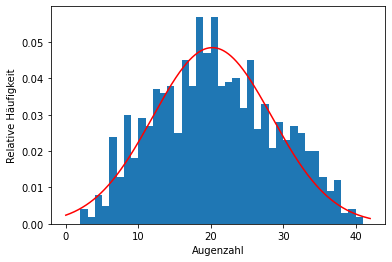

chi-Quadrat: 0.08236739345270044


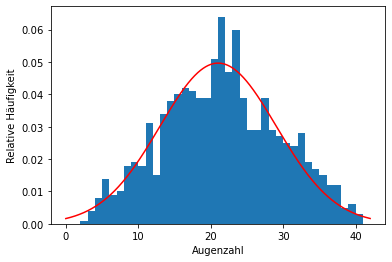

chi-Quadrat: 0.05562507661687002


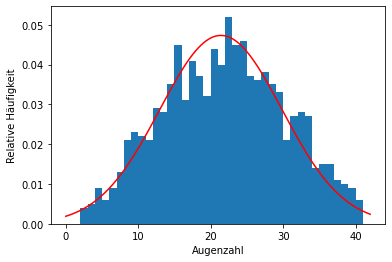

chi-Quadrat: 0.03962985787588


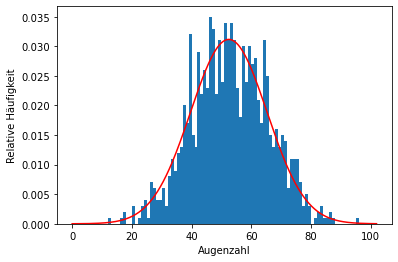

chi-Quadrat: 0.09206102300654355


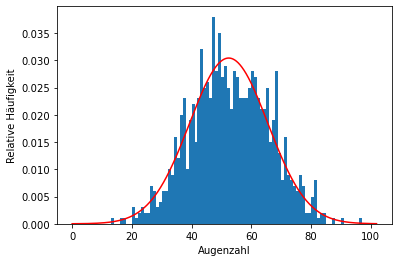

chi-Quadrat: 0.0899227520969592


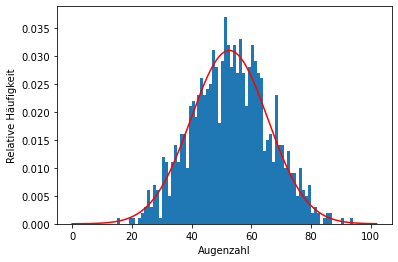

chi-Quadrat: 0.06904635501743114


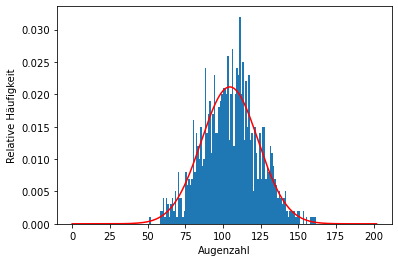

chi-Quadrat: 0.12253071577800104


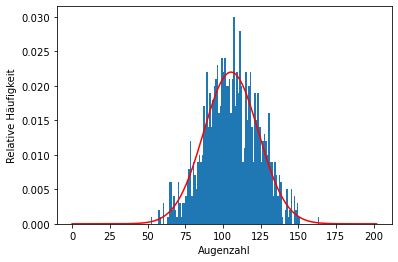

chi-Quadrat: 0.13773375222000192


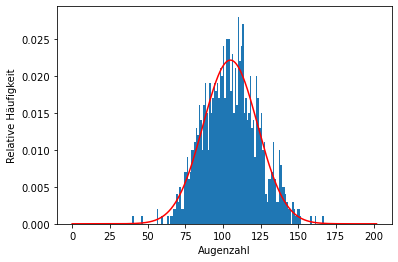

chi-Quadrat: 0.14233023807165757


In [168]:
#Aufgabe 1f)
chi_squared(dice4_1, sigma = dice4_1[2], mu = dice4_1[1], save = "2xD20,1,fit")
chi_squared(dice4_2, sigma = dice4_2[2], mu = dice4_2[1], save = "2xD20,2,fit")
chi_squared(dice4_3, sigma = dice4_3[2], mu = dice4_3[1], save = "2xD20,3,fit")
chi_squared(dice5_1, sigma = dice5_1[2], mu = dice5_1[1], save = "5xD20,1,fit")
chi_squared(dice5_2, sigma = dice5_2[2], mu = dice5_2[1], save = "5xD20,2,fit")
chi_squared(dice5_3, sigma = dice5_3[2], mu = dice5_3[1], save = "5xD20,3,fit")
chi_squared(dice6_1, sigma = dice6_1[2], mu = dice6_1[1], save = "10xD20,1,fit")
chi_squared(dice6_2, sigma = dice6_2[2], mu = dice6_2[1], save = "10xD20,2,fit")
chi_squared(dice6_3, sigma = dice6_3[2], mu = dice6_3[1], save = "10xD20,3,fit")

In [117]:
#f)

"""
Den besten Fit an experimentelle Datenwerte, also das kleinste χ2 erhält man, wenn man die aus dem Datensatz errechnete Standardabweichung und Mittelwert einsetzt.
Das ist besser als der theoretische Wert oder der Durchschnitt der experimentellen Standardabweichungen und Mittelwerte.
Bei endlichen statistischen Versuchen entspricht das Ergebnis einer Messreihe nie exakt dem theoretischen Wert. Den besten Fit erhält man dann natürlich durch die
aus ihm selbst berechneten Werte

Für mehr Würfel wird das χ2 größer, da bei gleichbleibender Anzahl an Würfen mehr Bins getroffen werden können. Die mögliche Abweichung vom theoretischen Wert pro Bin also größer wird.
Die experimentelle Datenmenge ist dadurch weiter von der theroetischen Gaußverteilung entfernt und kann deswegen auch nicht so gut mit einer Gaußfunktion approximiert werden.
Deutlich hier weil χ2 für 2 Würfel kleiner ist als für 5 und für 5 Würfel kleiner als für 10.
Mit mehr Würfen, also mehr Durchführungen des Versuchs, würde sich das χ2 auch hier, bei mehr Würfeln, wieder kleiner werden.

"""

'\nHier können Sie kommentieren:\nDer beste Fit an experimentelle Datenwerte, also das kleinste χ2 erhält man, wenn man die aus dem Datensatz errechnete Standardabweichung und Mittelwert einsetzt.\nDas ist besser als der theoretische Wert oder der Durchschnitt der experimentellen Standardabweichungen und Mittelwerte.\nBei endlichen statistischen Versuchen entspricht das Ergebnis einer Messreihe nie exakt dem theoretischen Wert. Den besten Fit erhält man dann natürlich durch die\naus ihm selbst berechneten Werte\n\nFür mehr Würfel wird das χ2 größer, da bei gleichbleibender Anzahl an Würfen mehr Bins getroffen werden können. Die mögliche Abweichung pro Bin also größer wird.\nDie experimentelle Datenmenge ist dadurch weiter von der theroetischen Gaußverteilung entfernt und kann deswegen auch nicht so gut mit einer Gaußfunktion approximiert werden.\nDeutlich hier weil χ2 für 2 Würfel kleiner ist als für 5 und für 5 Würfel kleiner als für 10.\nMit mehr Würfen, also mehr Durchführungen des 

# Aufgabe 1g)
## i) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels mindestens einmal die 20 fällt?
Wir betrachten die Wahrscheinlichkeit das die 20 überhaupt nicht fällt.
In jedem Wurf bleiben von den 20 Möglichkeiten noch 19 übrig. <br>
q ist damit = (1 - p)**10 = (19/20)**10<br>
Die gesuchte Wahrscheinlichkeit ist dann p = 1 - q = 1 - (19/20)**10 ≈ 0.401 

## ii) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels höchstens 2 mal die 1 fällt?
Die Wahrscheinlichkeit auf eine 1 ist p = 1/20 <br>
Wir betrachten nun die Wahrscheinlichkeiten das die Eins 0 mal, 1 mal oder 2 mal gewürfelt wird. <br>
Die Wahrscheinlichkeit das bei n Würfen die Zahl, mit Wahrscheinlichkeit p, genau k-mal vorkommt ist: <br>
$p(x=k) = n!/(k! * (n-k)!) * p**k * (1-p)**(n-k)$

Die Wahrscheinlichkeit das die gar nicht 1 fällt ist $(19/20)**10 ≈ 0.599$ <br>
$p(k=0) = math.factorial(10)/(math.factorial(0) * math.factorial(10-0)) * (1/20)**0 * (1-1/20)**(10-0) ≈ 0.599$ <br>
$p(k=1) = math.factorial(10)/(math.factorial(1) * math.factorial(10-1)) * (1/20)**1 * (1-1/20)**(10-1) ≈ 0.315$ <br>
$p(k=2) = math.factorial(10)/(math.factorial(2) * math.factorial(10-2)) * (1/20)**2 * (1-1/20)**(10-2) ≈ 0.075$ <br>

Die gesuchte Wahrscheinlichkeit ist damit $P = p(k=0) + p(k=1) + p(k=2) ≈ 0.988496$

## iii) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels genau 3 mal die 5 fällt?
Die Wahrscheinlichkeit das genau 3 mal die 5 fällt lässt sich mit der Formel aus Aufgabenteil ii) berechnen <br>
$p(k=3) = math.factorial(10)/(math.factorial(3) * math.factorial(10-3)) * (1/20)**3 * (1-1/20)**(10-3) ≈ 0.0105$

## iv) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels genau 3 mal die 5 UND höchstens 2 mal die 1
Die beiden Ereignisse ii) und iii) sind stochastisch abhängig: <br>
Damit das Ereignis eintritt müssen 3 Würfel eine 5 zeigen. Die übrigen 7 Würfel können nun 0, 1 oder 2 Einsen zeigen. <br>
Also p(iii) * (p(k=0) + p(k=1) + p(k=2)) <br>
math.factorial(10)/(math.factorial(3) * math.factorial(10-3)) * (1/20)**3 * (1-1/20)**(10-3) * ( <br>
    math.factorial(7)/(math.factorial(0) * math.factorial(7-0)) * (1/20)**0 * (1-1/20)**(7-0) + <br>
    math.factorial(7)/(math.factorial(1) * math.factorial(7-1)) * (1/20)**1 * (1-1/20)**(7-1) + <br>
    math.factorial(7)/(math.factorial(2) * math.factorial(7-2)) * (1/20)**2 * (1-1/20)**(7-2)) <br>
≈ 0.01043570419298467